### Task 3 - Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv("datasets/falcon9_dataset.csv")
df.head()

,FlightNumber,Date,Hour,Minute,BoosterVersion,PayloadMass,Orbit,LaunchSite,Serial,Block,Longitude,Latitude,Outcome,LandingPlace,Year,Month,Day,Flights,Reused
0,1,2010-06-04,18,45,Falcon 9,0.0,LEO,CCSFS SLC 40,B0003,1.0,-80.577366,28.561857,0,Ocean,2010,6,4,1,False
1,2,2010-12-08,15,43,Falcon 9,2115.0,ISS,CCSFS SLC 40,B0004,1.0,-80.577366,28.561857,0,Ocean,2010,12,8,1,False
2,6,2013-09-29,16,0,Falcon 9,500.0,PO,VSFB SLC 4E,B1003,1.0,-120.610829,34.632093,0,Ocean,2013,9,29,1,False
3,9,2014-04-18,19,25,Falcon 9,2296.0,ISS,CCSFS SLC 40,B1015,1.0,-80.577366,28.561857,1,Ocean,2014,4,18,1,False
4,10,2014-07-14,15,15,Falcon 9,1316.0,LEO,CCSFS SLC 40,B1018,1.0,-80.577366,28.561857,1,Ocean,2014,7,14,1,False


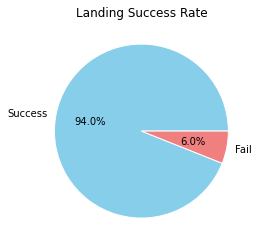

In [3]:
# total success rate
success = df.Outcome.value_counts()
success
plt.pie(success, labels=["Success", "Fail"], colors=["skyblue", "lightcoral"], autopct='%1.1f%%',wedgeprops=dict(linewidth=1, edgecolor='w'))
plt.title("Landing Success Rate")
plt.show()

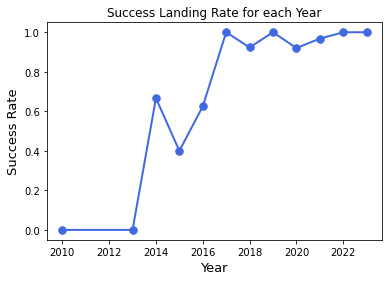

In [4]:
# success landing rate for each year
year_success_rate = df.groupby(["Year"])["Outcome"].sum() / df.groupby(["Year"])["Outcome"].count()

plt.plot(year_success_rate.index, year_success_rate.values, color='royalblue', linestyle="-", linewidth=2, marker='.', markersize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Success Rate', fontsize=13)
plt.title("Success Landing Rate for each Year")
plt.show()

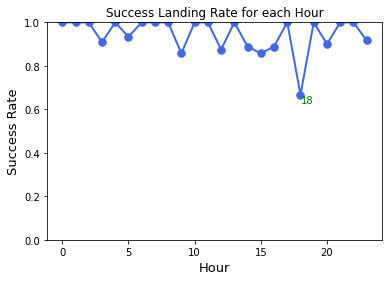

In [10]:
# success landing rate for each hour
hour_success_rate = df.groupby(["Hour"])["Outcome"].sum() / df.groupby(["Hour"])["Outcome"].count()

plt.plot(hour_success_rate.index, hour_success_rate.values, color="royalblue", linestyle='-', linewidth=2, marker='.', markersize=15)
plt.ylim(0,1.00)
plt.xlabel('Hour', fontsize=13)
plt.ylabel('Success Rate', fontsize=13)
plt.text(18,0.63,'18',{'fontsize':10}, color='g')
plt.title("Success Landing Rate for each Hour")
plt.show()

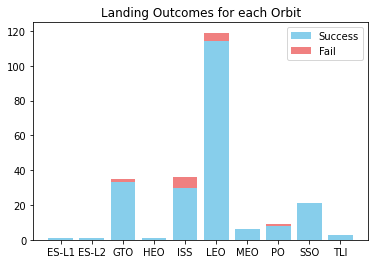

In [6]:
# Landing Outcomes for each Orbit
success = df.groupby(["Orbit"])["Outcome"].sum()
unsuccess = df.groupby(["Orbit"])["Outcome"].count() - df.groupby(["Orbit"])["Outcome"].sum()

sites = success.index
success_arr = success.array
unsuccess_arr = unsuccess.array

fig, ax = plt.subplots()


p1 = ax.bar(sites, success_arr, label='Success', color='skyblue')
p2 = ax.bar(sites, unsuccess_arr, label='Fail', bottom=success_arr, color='lightcoral')

ax.legend()
plt.title("Landing Outcomes for each Orbit")
plt.show()


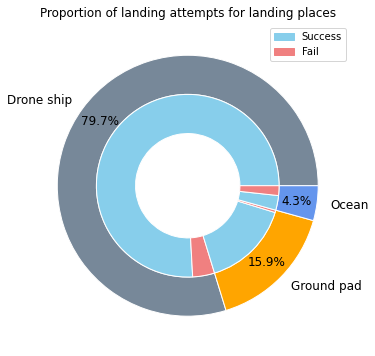

In [7]:
# The proportion of launch attempts for each landing place and its corresponding success rate
landingplace = df.groupby(["LandingPlace"])["Outcome"].count()
values = df.groupby(["LandingPlace"])["Outcome"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
size = 0.3

outer_colors = ['lightslategray','orange','cornflowerblue']
inner_colors = ['skyblue','lightcoral']

# outer pie
ax.pie(landingplace, 
       radius=1,
       colors=outer_colors, 
       labels=landingplace.index,
       pctdistance=0.84,
       autopct='%1.1f%%',
       textprops={'fontsize': 12},
       wedgeprops=dict(width=size, edgecolor='w'))

# inner pie
ax.pie(values, 
       radius=1-size,
       colors=inner_colors,
       pctdistance=0.8,
       textprops={'fontsize': 8},
       wedgeprops=dict(width=size, edgecolor='w'))


success = mpatches.Patch(color='skyblue', label='Success')
fail = mpatches.Patch(color='lightcoral', label='Fail')
ax.legend(handles=[success, fail])
plt.title("Proportion of landing attempts for landing places")
plt.show()

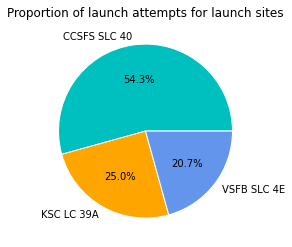

In [8]:
# the proportion of launch attempts for the launch sites
launchsite = df.groupby(["LaunchSite"])["Outcome"].count()

plt.pie(launchsite, labels=launchsite.index, autopct='%1.1f%%', colors=['c', 'orange', 'cornflowerblue'],wedgeprops=dict(linewidth=1, edgecolor='w'))
plt.title("Proportion of launch attempts for launch sites")
plt.show()

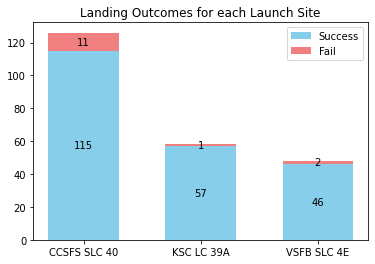

In [9]:
# Landing Outcomes for each Launch Site
success = df.groupby(["LaunchSite"])["Outcome"].sum()
unsuccess = df.groupby(["LaunchSite"])["Outcome"].count() - df.groupby(["LaunchSite"])["Outcome"].sum()

sites = success.index
success_arr = success.array
unsuccess_arr = unsuccess.array

fig, ax = plt.subplots()
width = 0.6

p1 = ax.bar(sites, success_arr, width, label='Success', color='skyblue')
p2 = ax.bar(sites, unsuccess_arr, width, label='Fail', bottom=success_arr, color='lightcoral')

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

ax.legend()
plt.title("Landing Outcomes for each Launch Site")
plt.show()
